# Alpha Ratio method for W+jet estimation (OLD)

> In this notebook, I extracted W+jets information from figures: [fig link](https://www.dropbox.com/s/m65ieodllpaj69t/m_lvj_sb_lo_WJets0_xww__with_pull.png?dl=0)
![fig](plots_em_HP/m_lvj_fitting/m_lvj_sb_lo_WJets0_xww_.png)

> I saved this distribution in \*.C file where it contains info in TGraph format. So, I extracted the position of W+jets and diboson. Then, to get actual contribution I subtracted the two.

In [1]:
import ROOT as r

r.gSystem.Load("PDFs/PdfDiagonalizer_cc.so")
r.gSystem.Load("PDFs/Util_cxx.so")
r.gSystem.Load("PDFs/HWWLVJRooPdfs_cxx.so")

# To surpress unwanted messages
msgservice = r.RooMsgService.instance()
msgservice.setGlobalKillBelow(r.RooFit.FATAL)

%matplotlib inline

Welcome to JupyROOT 6.08/05


## Array extracted from TGraph of above stack plot

In [ ]:
WJets_fx273 = [
   170,
   170,
   182.5,
   195,
   201.25,
   207.5,
   213.75,
   220,
   226.25,
   232.5,
   238.75,
   245,
   257.5,
   270,
   295,
   307.5,
   320,
   332.5,
   345,
   351.25,
   357.5,
   363.75,
   370,
   376.25,
   382.5,
   388.75,
   395,
   401.25,
   407.5,
   413.75,
   420,
   426.25,
   432.5,
   445,
   457.5,
   470,
   482.5,
   495,
   507.5,
   520,
   545,
   570,
   595,
   620,
   645,
   670,
   695,
   720,
   745,
   770,
   795,
   820,
   845,
   870,
   895,
   920,
   970,
   1020,
   1070,
   1120,
   1170,
   1220,
   1270,
   1320,
   1370,
   1420,
   1470,
   1520,
   1570,
   1620,
   1670,
   1720,
   1770,
   1820,
   1870,
   1920,
   1970,
   2020,
   2070,
   2120,
   2170,
   2220,
   2270,
   2320,
   2370,
   2420,
   2470,
   2470,
   2470]
WJets_fy273 = [
   0,
   2.095888,
   3.75576,
   6.228629,
   7.818831,
   9.664628,
   11.77567,
   14.15693,
   16.80842,
   19.72515,
   22.89724,
   26.31016,
   33.77957,
   41.94082,
   59.37465,
   68.12449,
   76.55537,
   84.43881,
   91.58089,
   94.82446,
   97.82879,
   100.5817,
   103.0738,
   105.2984,
   107.2514,
   108.9311,
   110.3383,
   111.4757,
   112.3482,
   112.962,
   113.3254,
   113.4475,
   113.3388,
   112.475,
   110.8322,
   108.5148,
   105.6285,
   102.277,
   98.55853,
   94.56436,
   86.07066,
   77.34646,
   68.79624,
   60.69369,
   53.20508,
   46.41425,
   40.34551,
   34.9829,
   30.28515,
   26.19688,
   22.65654,
   19.6017,
   16.97237,
   14.71295,
   12.77318,
   11.10841,
   8.452485,
   6.491059,
   5.036576,
   3.952358,
   3.139282,
   2.525479,
   2.058732,
   1.700975,
   1.424365,
   1.208459,
   1.038201,
   0.9024645,
   0.793002,
   0.7036789,
   0.6299155,
   0.5682787,
   0.5161825,
   0.4716686,
   0.4332449,
   0.3997662,
   0.3703468,
   0.3442961,
   0.32107,
   0.3002365,
   0.2814485,
   0.2644245,
   0.2489338,
   0.2347854,
   0.22182,
   0.2099028,
   0.1989196,
   0.1989196,
   0]
   
VV_fx274 = [
   170,
   170,
   182.5,
   188.75,
   195,
   201.25,
   207.5,
   220,
   232.5,
   245,
   257.5,
   270,
   295,
   307.5,
   320,
   332.5,
   345,
   357.5,
   370,
   382.5,
   395,
   407.5,
   420,
   432.5,
   445,
   457.5,
   470,
   482.5,
   495,
   507.5,
   520,
   532.5,
   545,
   570,
   620,
   645,
   670,
   695,
   720,
   745,
   770,
   795,
   820,
   845,
   870,
   895,
   920,
   945,
   970,
   995,
   1020,
   1070,
   1120,
   1170,
   1220,
   1270,
   1320,
   1370,
   1420,
   1470,
   1520,
   1570,
   1620,
   1670,
   1720,
   1770,
   1820,
   1870,
   1920,
   1970,
   2020,
   2070,
   2120,
   2170,
   2220,
   2270,
   2320,
   2370,
   2420,
   2470,
   2470,
   2470]
VV_fy274 = [
   0,
   1.488729,
   2.458872,
   3.070293,
   3.769821,
   4.558478,
   5.435756,
   7.446796,
   9.770855,
   12.35767,
   15.14395,
   18.0589,
   23.98362,
   26.85595,
   29.58786,
   32.13017,
   34.44357,
   36.49866,
   38.27555,
   39.76307,
   40.95779,
   41.86292,
   42.48715,
   42.84362,
   42.94882,
   42.82169,
   42.48274,
   41.95343,
   41.25546,
   40.41034,
   39.43902,
   38.3615,
   37.1967,
   34.67438,
   29.26401,
   26.55709,
   23.93538,
   21.44156,
   19.10399,
   16.93943,
   14.95555,
   13.15313,
   11.52784,
   10.07184,
   8.774906,
   7.625449,
   6.611208,
   5.719791,
   4.939071,
   4.257444,
   3.664008,
   2.702161,
   1.982943,
   1.449036,
   1.055077,
   0.7658491,
   0.5544178,
   0.4004201,
   0.2886052,
   0.2076379,
   0.149146,
   0.1069779,
   0.07663311,
   0.05483194,
   0.0391915,
   0.02798539,
   0.0199658,
   0.01423274,
   0.01013826,
   0.007216629,
   0.005133608,
   0.003649614,
   0.002593125,
   0.001841482,
   0.00130705,
   0.0009272788,
   0.0006575564,
   0.0004660908,
   0.0003302421,
   0.0002338986,
   0.0002338986,
   0]

# Make Graph from above array

In [ ]:
cr = r.TCanvas("")

from array import array 

graph = r.TGraph(len(WJets_fy273),array('d',WJets_fx273),array('d',WJets_fy273))

graph.Draw("AP*")
print graph.Integral()
cr.Draw()

48


Warning in <TCanvas::Constructor>: Deleting canvas with same name: 


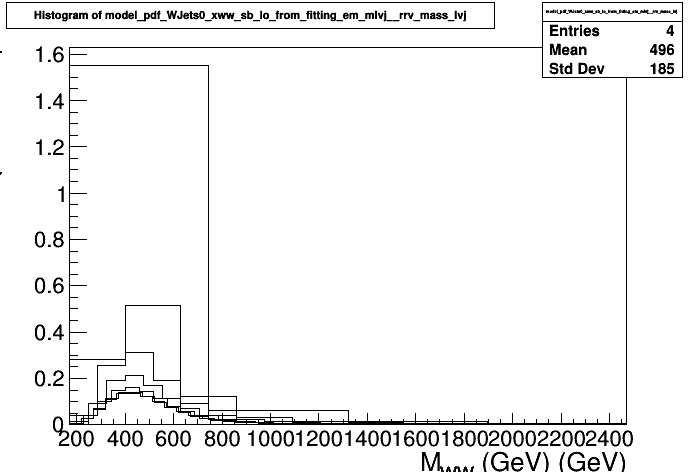

In [8]:
cr = r.TCanvas("")

Wjet_file_auto = r.TFile.Open("wjetmodel_Ex__WJets0_xww__sb_lo_auto.root")
Wjet_file_47bin = r.TFile.Open("wjetmodel_Ex__WJets0_xww__sb_lo_47bin.root")
Wjet_file_40bin = r.TFile.Open("wjetmodel_Ex__WJets0_xww__sb_lo_40bin.root")
Wjet_file_30bin = r.TFile.Open("wjetmodel_Ex__WJets0_xww__sb_lo_30bin.root")
Wjet_file_20bin = r.TFile.Open("wjetmodel_Ex__WJets0_xww__sb_lo_20bin.root")
Wjet_file_10bin = r.TFile.Open("wjetmodel_Ex__WJets0_xww__sb_lo_10bin.root")
Wjet_file_4bin = r.TFile.Open("wjetmodel_Ex__WJets0_xww__sb_lo_4bin.root")

Wjet_hist_auto = Wjet_file_auto.Get("rrv_mass_lvj__rrv_mass_lvj")
Wjet_hist_47bin = Wjet_file_47bin.Get("model_pdf_WJets0_xww_sb_lo_from_fitting_em_mlvj__rrv_mass_lvj")
Wjet_hist_40bin = Wjet_file_40bin.Get("model_pdf_WJets0_xww_sb_lo_from_fitting_em_mlvj__rrv_mass_lvj")
Wjet_hist_30bin = Wjet_file_30bin.Get("model_pdf_WJets0_xww_sb_lo_from_fitting_em_mlvj__rrv_mass_lvj")
Wjet_hist_20bin = Wjet_file_20bin.Get("model_pdf_WJets0_xww_sb_lo_from_fitting_em_mlvj__rrv_mass_lvj")
Wjet_hist_10bin = Wjet_file_10bin.Get("model_pdf_WJets0_xww_sb_lo_from_fitting_em_mlvj__rrv_mass_lvj")
Wjet_hist_4bin = Wjet_file_4bin.Get("model_pdf_WJets0_xww_sb_lo_from_fitting_em_mlvj__rrv_mass_lvj")
#Wjet_hist_auto.Rebin(11)
#print Wjet_hist_auto.Integral(),Wjet_hist_auto.Integral("width")
#Wjet_hist_auto.Scale(501.911)
#print Wjet_hist_auto.Integral(),Wjet_hist_auto.Integral("width")


print Wjet_hist_auto.GetSize()
#print Wjet_hist_47bin.GetSize()
#Wjet_file_47bin.Scale(501.911)
Wjet_hist_4bin.Draw()
Wjet_hist_auto.Draw("same")
Wjet_hist_47bin.Draw("same")
Wjet_hist_40bin.Draw("same")
Wjet_hist_30bin.Draw("same")
Wjet_hist_20bin.Draw("same")
Wjet_hist_10bin.Draw("same")
#Wjet_hist_4bin.Draw("same")
cr.Draw()

In [ ]:
newHist = r.TH1F("newHist","",4,170,2502)
binVal = [0]*5
count=0
for i in range(1,47):
    if i%12 ==1:
        count+=1
    binVal[count] += Wjet_hist_auto.GetBinContent(i)
    print i,count,Wjet_hist_auto.GetBinContent(i),Wjet_hist_auto.GetBinLowEdge(i)

for i in range(1,5):
    newHist.SetBinContent(i,binVal[i])

# Read root file for W+jet and make signal-region and side-band region distribution

In [ ]:
fin = r.TFile.Open("root://cmseos.fnal.gov//store/user/rasharma/SecondStep/WWTree_2018_01_25_14h36/Hadds_for_BkgEstimation/WWTree_WJets.root")

treeIn = fin.Get("otree")

In [ ]:
hSignal = r.TH1D("hSignal","",4,170,2470)

hSideBand = r.TH1D("hSideBand","",4,170,2470)


cutString_SideBand =  "wSampleWeight*35867.06*btag0Wgt*genWeight*trig_eff_Weight*id_eff_Weight*pu_Weight*((l_pt2<0) && ((l_pt1>30.) && (abs(l_eta1)<2.5)) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) &&  (nBTagJet_loose==0) && (pfMET_Corr>50) && ((PuppiAK8_jet_tau2tau1<0.55)) && ((PuppiAK8_jet_mass_so>40 && PuppiAK8_jet_mass_so<65) || (PuppiAK8_jet_mass_so>105 && PuppiAK8_jet_mass_so<150)) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0) && (vbf_maxpt_jj_m>800) && (BosonCentrality_type0>1.0) && (abs(ZeppenfeldWL_type0/vbf_maxpt_jj_Deta)<0.3) && (abs(ZeppenfeldWH/vbf_maxpt_jj_Deta)<0.3) && (mass_lvj_type0>170))"

cutString_Signal =  "wSampleWeight*35867.06*btag0Wgt*genWeight*trig_eff_Weight*id_eff_Weight*pu_Weight*((l_pt2<0) && ((l_pt1>30.) && (abs(l_eta1)<2.5)) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) &&  (nBTagJet_loose==0) && (pfMET_Corr>50) && ((PuppiAK8_jet_tau2tau1<0.55)) && ((PuppiAK8_jet_mass_so>65) && (PuppiAK8_jet_mass_so<105)) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0) && (vbf_maxpt_jj_m>800) && (BosonCentrality_type0>1.0) && (abs(ZeppenfeldWL_type0/vbf_maxpt_jj_Deta)<0.3) && (abs(ZeppenfeldWH/vbf_maxpt_jj_Deta)<0.3) && (mass_lvj_type0>170))"


treeIn.Draw("mass_lvj_type0>>hSideBand",cutString_SideBand)
treeIn.Draw("mass_lvj_type0>>hSignal",cutString_Signal)


## Calculate alpha by dividing W+jets MC in signal and side-band region

In [ ]:
try: 
    Alpha.Delete();
except: 
    print "Alpha does not exists";
    
Alpha =  r.TH1D("Alpha","",4,0,2400)
Alpha = hSignal.Clone()
Alpha.Divide(hSideBand)
c1 = r.TCanvas("c1", "canvas", 800, 600)
Alpha.GetXaxis().SetTitle("mWW (GeV)")
Alpha.GetYaxis().SetTitle("alpha from MC only (Signal/Side-band)")
Alpha.Draw()
#Alpha.Fit("expo")
c1.Draw()

In [ ]:
c = r.TCanvas("c", "canvas", 800, 600)
c.cd()
hSignal.SetMarkerColor(1)
hSignal.SetLineColor(1)
hSignal.SetLineWidth(3)
hSignal.SetMarkerSize(5)
hSideBand.SetMarkerColor(2)
hSideBand.SetLineColor(2)
hSideBand.SetLineWidth(3)
hSideBand.SetMarkerSize(5)

r.TGaxis.SetMaxDigits(3)

leg = r.TLegend(0.55,0.9,.9,0.6)
leg.AddEntry(hSignal,"signal region (MC)")
leg.AddEntry(hSideBand,"SideBand Region (MC)")

hSignal.SetMaximum(2500.)
hSignal.SetMinimum(.1)

hSignal.Draw()
#hSignal.Fit("gausn(0)")
hSideBand.Draw("same")
leg.Draw()
#c.SetLogy()
c.Draw()

## Make distribution of W+jet extracted from fit

> Below the length of extracted array was shown. Since these array size are different so they are extracted seperatly then subtracted.

In [ ]:
print len(WJets_fx273)
print len(WJets_fy273)
print len(VV_fx274)
print len(VV_fy274)

In [ ]:
#leg.Clear()
#leg.AddEntry(hSignal,"signal region")
#leg.AddEntry(hSideBand,"SideBand Region")
hModel = r.TH1F("hModel","",4,170,2470)


bin_Wjet = [0]*5 

bin_VV = [0]*5 


multiplicationFactor = 575   # (2470-170)/4 = 575

for i,x in enumerate(WJets_fx273):
    for j in range(1,5):
        if x >= 170+multiplicationFactor*(j-1) and x < 170+multiplicationFactor*(j):
            #print "==> ",i,"\t",j
            bin_Wjet[j] += (WJets_fy273[i])
for i,x in enumerate(VV_fx274):
    for j in range(1,5):
        if x >= 170+multiplicationFactor*(j-1) and x < 170+multiplicationFactor*(j):
            #print "==> ",i,"\t",j
            bin_VV[j] += (VV_fy274[i])         
        

for i in range(1,5):
    hModel.SetBinContent(i,bin_Wjet[i]-bin_VV[i])
    print "Bin ",i,"\t",bin_Wjet[i]-bin_VV[i]

hModel.SetMarkerColor(3)
hModel.SetLineColor(3)
hModel.SetLineWidth(3)
hModel.SetMarkerSize(5)

leg.AddEntry(hModel,"Corrected Wjet (SB) (From Graph)")

#hModel.Scale(504)
hModel.Draw("same")
leg.Draw()
c.Draw()

In [ ]:
c = r.TCanvas("")
Wjet_file = r.TFile.Open("wjetmodel_WJets0_xww__sb_lo_47bin.root")
Wjet_hist = r.TH1F()
Wjet_hist.Sumw2()
Wjet_hist = Wjet_file.Get("model_WJets0_xww_sb_lo_from_fitting_em_mlvj__rrv_mass_lvj")
Wjet_hist.Draw()
print Wjet_hist.Integral("width")
print Wjet_hist.Integral()


#c.SetLogy()
c.Draw()

In [ ]:

Wjet_file_4bin = r.TFile.Open("wjetmodel_WJets0_xww__sb_lo_4bin.root")
Wjet_hist_4bin = r.TH1F()
Wjet_hist_4bin.Sumw2()
Wjet_hist_4bin = Wjet_file_4bin.Get("model_WJets0_xww_sb_lo_from_fitting_em_mlvj__rrv_mass_lvj")
Wjet_hist_4bin.Draw("same")
print Wjet_hist_4bin.Integral("width")
print Wjet_hist_4bin.Integral()
c.Draw()

In [ ]:
#c = r.TCanvas("c", "canvas", 800, 600)

Wjet_file = r.TFile.Open("wjetmodel_WJets0_xww__sb_lo_47bin.root")
Wjet_hist = r.TH1F()
Wjet_hist.Sumw2()
Wjet_hist = Wjet_file.Get("model_WJets0_xww_sb_lo_from_fitting_em_mlvj__rrv_mass_lvj")
Wjet_hist.SetMarkerColor(6)
Wjet_hist.SetLineColor(6)
Wjet_hist.SetLineWidth(3)
Wjet_hist.SetMarkerSize(1)
Wjet_hist.Scale(501.911)

print "Wjet_hist integral = ",Wjet_hist.Integral()
newHist = r.TH1F("newHist","",4,170,2470)
binVal = [0]*5
count=0
for i in range(0,47):
    if i%12 ==1:
        count+=1
    binVal[count] += Wjet_hist.GetBinContent(i)
    #print i,count,Wjet_hist.GetBinContent(i),binVal[count]

for i in range(1,5):
    newHist.SetBinContent(i,binVal[i])
newHist.newHist.SetLineWidth(3)
newHist.SetMarkerSize(1)
newHist.Draw("same hist")

print "new Hist integral = ",newHist.Integral()

for i in range(1,5):
    print newHist.GetBinContent(i)

###########

#Wjet_hist.Rebin(11)
#Wjet_hist.Draw("same hist")


Wjet_file_4bin = r.TFile.Open("wjetmodel_WJets0_xww__sb_lo_4bin.root")
Wjet_hist_4bin = r.TH1F()
Wjet_hist_4bin.Sumw2()
Wjet_hist_4bin = Wjet_file_4bin.Get("model_WJets0_xww_sb_lo_from_fitting_em_mlvj__rrv_mass_lvj")
#Wjet_hist.Sumw2()
Wjet_hist_4bin.SetMarkerColor(5)
Wjet_hist_4bin.SetLineColor(5)
#Wjet_hist_4bin.SetLineStyle(6)
Wjet_hist_4bin.SetLineWidth(3)
Wjet_hist_4bin.SetMarkerSize(1)
Wjet_hist_4bin.Rebin(12)
Wjet_hist_4bin.Scale(501.911)
#Wjet_hist.Draw()
Wjet_hist_4bin.Draw("same hist")



leg.AddEntry(newHist,"Corr Wjet (SB) 47bin")
leg.AddEntry(Wjet_hist_4bin,"Corr Wjet (SB) 4 bin")



c.Draw()

# Multiplication by Alpha to get Signal Region W+jets obtained from data.

In [ ]:
hModel_Sig = r.TH1F("hModel_Sig","",4,170,2470)
hModel_Sig.Sumw2()
hModel_Sig.SetMarkerColor(4)
hModel_Sig.SetLineColor(4)
hModel_Sig.SetLineWidth(3)
hModel_Sig.SetMarkerSize(5)

hModel_Sig.SetBinContent(1,hModel.GetBinContent(1)*Alpha.GetBinContent(1))
hModel_Sig.SetBinContent(2,hModel.GetBinContent(2)*Alpha.GetBinContent(2))
hModel_Sig.SetBinContent(3,hModel.GetBinContent(3)*Alpha.GetBinContent(3))
hModel_Sig.SetBinContent(4,hModel.GetBinContent(4)*Alpha.GetBinContent(4))



hModel_Sig.Draw("same")

leg.AddEntry(hModel_Sig,"W+jet Signal Region (Alpha)")


c.Draw()
